In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('/Users/kaiyang/desktop/employeedata.csv')
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


In [28]:
df['dummy'] = 0
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,dummy
0,1,m,2/3/1952,15,3,57000,27000,98,144,0,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0,0


In [30]:
df.drop('dummy', axis=1, inplace=True)
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


In [32]:
import numpy as np
df['genderdummy_F'] = np.where(df['gender'] == "f", 1, 0)
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,genderdummy_F
0,1,m,2/3/1952,15,3,57000,27000,98,144,0,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0,1
3,4,f,4/15/1947,8,1,21900,13200,98,190,0,1
4,5,m,2/9/1955,15,1,45000,21000,98,138,0,0


In [40]:
# Alternative approaches

def my_recode(gender):
    if gender == "f":
        return 1
    else:
        return 0

In [42]:
my_recode("f"), my_recode("m")

(1, 0)

In [44]:
df['genderdummy_F'] = df['gender'].apply(my_recode)
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,genderdummy_F
0,1,m,2/3/1952,15,3,57000,27000,98,144,0,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0,1
3,4,f,4/15/1947,8,1,21900,13200,98,190,0,1
4,5,m,2/9/1955,15,1,45000,21000,98,138,0,0


In [47]:
# Altrnative method 2

df['genderdummy_F'] = df['gender'].apply(lambda x: 1 if x == "f" else 0)
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,genderdummy_F
0,1,m,2/3/1952,15,3,57000,27000,98,144,0,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0,1
3,4,f,4/15/1947,8,1,21900,13200,98,190,0,1
4,5,m,2/9/1955,15,1,45000,21000,98,138,0,0


### Relacing values

In [50]:
category = [1,2,3]
status = ["non-manager", "non-manager", "manager"]

df['Manager'] = df['jobcat'].replace(category, status)
df[170:175]

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority,genderdummy_F,Manager
170,171,m,1/21/1930,12,1,26700,13500,86,367,1,0,non-manager
171,172,f,6/13/1953,15,1,29850,15000,86,79,1,1,non-manager
172,173,m,1/15/1950,20,3,69250,42480,85,134,0,0,manager
173,174,m,1/7/1935,8,2,31950,15000,85,438,0,0,non-manager
174,175,m,1/8/1938,8,1,26250,15600,85,171,0,0,non-manager


/var/folders/rr/q2hphpp53sg6tswwk64tz_tw0000gn/T/ipykernel_34992/401133693.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['logSalary'], shade=True, linewidth=2);


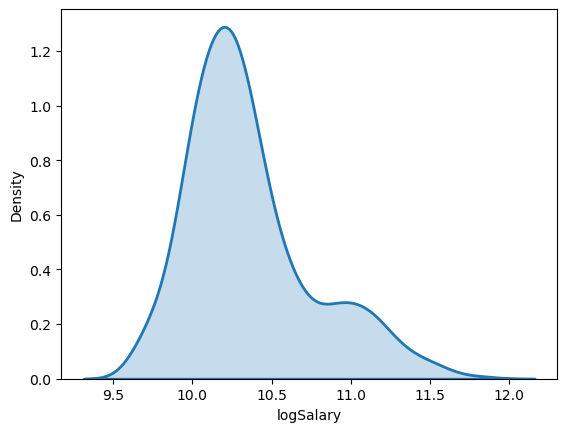

In [59]:
df['logSalary'] = np.log(df['salary'])
import seaborn as sns
sns.kdeplot(x=df['logSalary'], shade=True, linewidth=2);